In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl")

hjbsolver_delta1 (generic function with 1 method)

In [2]:
p = 120.0;
k = (0.05 / 1.25) * p;
δ = 0.15;

function FR12(u, b1, b2)
    lambda1 = 0.25
    lambda2 = 0.5
    return (-b1 * lambda2 * exp(-u * lambda1 / b1) + b2 * lambda1 * exp(-lambda2 * u / b2) + b1 * lambda2 - b2 * lambda1) / (b1 * lambda2 - b2 * lambda1)
end

F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
#F2 = SampleDistFun(x -> cdf(Weibull(0.5, 2), x), 40.0, 0.005)
F2(x) = 1 - exp(-0.7071067812 * sqrt(x))
FR1(x, a1) = F1(x / a1)
FR2(x, a2) = F2(x / a2)


FR(r, x) =
    0.3333333333333333 * FR1(x, r[1]) +
    0.4 * FR2(x, r[2]) +
    0.26666666666666666 * FR12(x, r[1], r[2])
ER1(a1) = 2.4 * a1
ER2(a2) = 4 * a2
ER12(a1, a2) = 4 * a1 + 2 * a2
ER(r) =
    0.3333333333333333 * ER1(r[1]) +
    0.4 * ER2(r[2]) +
    0.26666666666666666 * ER12(r[1], r[2])

EnoR = ER([1.0, 1.0])

4.0

In [3]:
res = bisection_hjbsolver(
    a=0,
    b=p / δ^2,
    max_it=20,
    NRe=2,
    β=5.0 + 6.0 + 4.0,
    FR=FR,
    ER=ER,
    EnoR=EnoR,
    partition=(0.0, 19.0, 200.0, 800.0),
    Δx=0.05,
    SearchRanges=([(0.0, 1.0), (0.0, 1.0)], [(0.0, 1.0), (1.0, 1.0)]),
    η=0.25,
    η1=0.3,
    δ=0.15,
    MaxEvals=1500,
    p=p,
    L=300,
)

(0, 2666.666666666667, 5333.333333333334)
(0, 1333.3333333333335, 2666.666666666667)
(0, 666.6666666666667, 1333.3333333333335)
10%, V(80.0) = 4054.8   Time = 456.0 seconds
(0, 333.33333333333337, 666.6666666666667)
10%, V(80.0) = 1950.9   Time = 476.0 seconds
20%, V(160.0) = 3279.0   Time = 1890.0 seconds
30%, V(240.0) = 5276.3   Time = 2940.0 seconds
(0, 166.66666666666669, 333.33333333333337)
10%, V(80.0) = 898.77   Time = 471.0 seconds
20%, V(160.0) = 1190.7   Time = 1720.0 seconds
(166.66666666666669, 250.00000000000003, 333.33333333333337)
10%, V(80.0) = 1424.9   Time = 349.0 seconds
20%, V(160.0) = 2235.0   Time = 1370.0 seconds
30%, V(240.0) = 3248.5   Time = 2210.0 seconds
40%, V(320.0) = 4705.9   Time = 2210.0 seconds
50%, V(400.0) = 7030.1   Time = 2220.0 seconds
(166.66666666666669, 208.33333333333337, 250.00000000000003)
10%, V(80.0) = 1161.8   Time = 383.0 seconds
20%, V(160.0) = 1712.9   Time = 1490.0 seconds
30%, V(240.0) = 2234.4   Time = 2290.0 seconds
40%, V(320.0) =

11-element Vector{Any}:
 (0.0:0.05:8.95, [2666.666666666667, 2692.0385847090674, 2717.6597126016127, 2742.9386592253863, 2768.021205645501, 2792.976414490443, 2817.8441320647535, 2842.6481841630175, 2867.4037713448033, 2892.120091073464  …  5584.309703291748, 5596.682037204975, 5609.02733513791, 5621.345815389873, 5633.637672130773, 5645.903110785776, 5658.142334284198, 5670.355563429341, 5682.542951519542, 5694.704707961037], [507.438360848008, 512.422557850904, 505.57893247547395, 501.6509284022961, 499.10417689883894, 497.35435148621434, 496.08104196528257, 495.1117436357165, 494.32639457321676, 493.6464323722407  …  247.44667826454852, 246.90595865870577, 246.36960503925715, 245.83713481800365, 245.30877310006827, 244.78446996844454, 244.26458290284603, 243.74776180403148, 243.23512882990082, 242.72650291587556], [0.9999999999999999 1.0; 0.9999800891312632 0.9999875961613783; … ; 0.27610062941159735 0.99999969972845; 0.2774249769684816 0.9999991713611972], 1)
 (0.0:0.05:46.35, [133

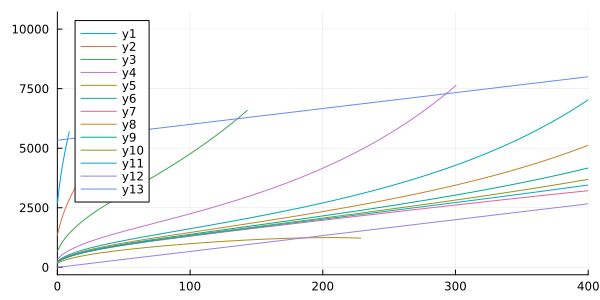

In [4]:
plot(res[1][1], res[1][2], size=(600, 300))
for i = 2:length(res)
    plot!(res[i][1], res[i][2], size=(600, 300))
end
plot!(x -> x / δ, xlims=(0, 400))
plot!(x -> x / δ + p / δ^2, xlims=(0, 400))

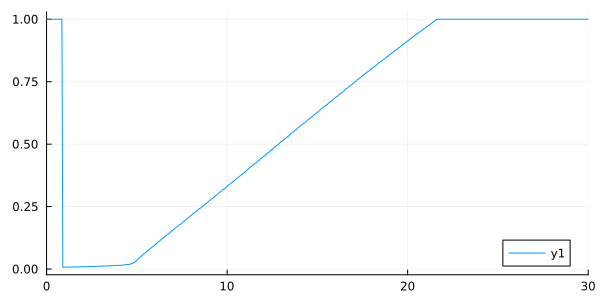

In [5]:
plot(res[end][1], res[end][4][:, 1], size=(600, 300), xlims=(0, 30))

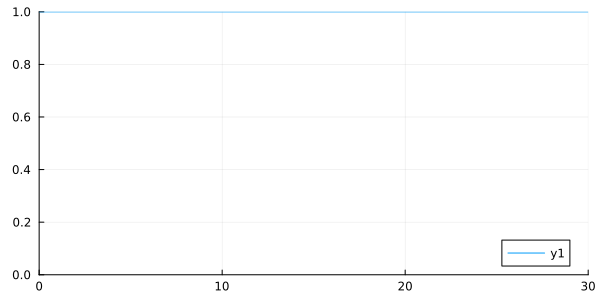

In [6]:
plot(res[end][1], res[end][4][:, 2], size=(600, 300), xlims=(0, 30), ylims=(0, 1))